<a href="https://colab.research.google.com/github/TZajas/CS4287-Projects/blob/main/CS4287_Prj1_20278748_20251874.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS4278 MLP Project**

In [4]:
# Tomasz Zajas: 20278748
# Farran Haley: 20251874
# Runs: bool

In [5]:
# Importing necessary libraries
from IPython.display import display

# For processing dataset
import numpy as np
import pandas as pd

# For plotting dataset and model
import seaborn as sb
import matplotlib.pyplot as plt

# For creating and training model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

# Dataset Exploration and Visualisation

In [6]:
# Reading the dataset using the pandas library
dataset_path = "water_potability.csv"
df = pd.read_csv(dataset_path)

In [7]:
# Displaying the first few rows of the dataset
display(df.head())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
# Displaying the statistics of the dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
# Displaying the shape of the data, 10 features and 3276 samples
df.shape

(3276, 10)

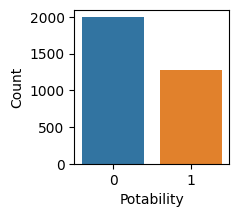

0    1998
1    1278
Name: Potability, dtype: int64


In [17]:
# Displaying the difference in volume between potabale and non-potable rows
plt.figure(figsize=(2, 2))

sb.countplot(data=df, x='Potability')
plt.ylabel('Count')
plt.show()

# Displaying the exact count of potable and non-potable rows
potability_counts = df['Potability'].value_counts()
print(potability_counts)

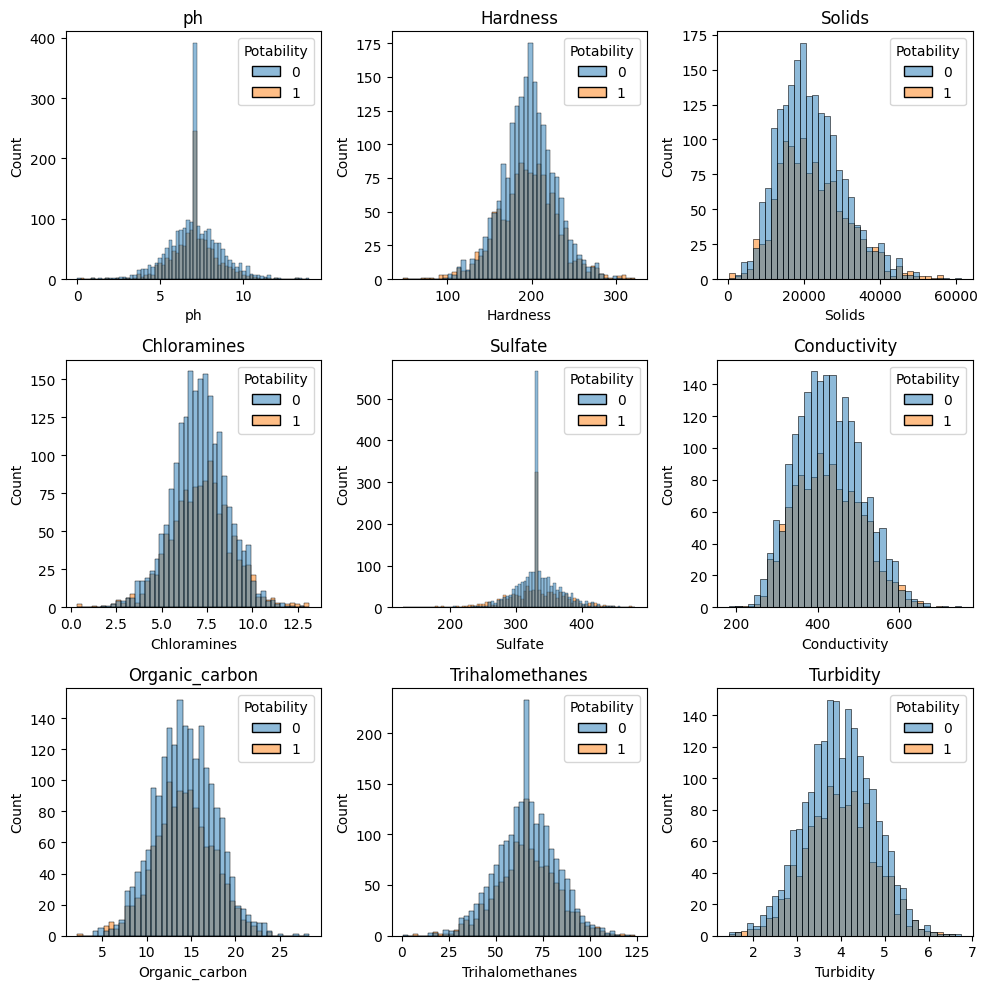

In [36]:
# Visualises the distribution of the numerical value with respect to Potability(target variable)
num=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
fig = plt.figure(figsize=(10,10))

for i in range(len(num)):
    plt.subplot(3,3,i+1)
    plt.title(num[i])
    sb.histplot(data=df,x=df[num[i]],hue='Potability')
plt.tight_layout()
plt.show()


## Data Preprocessing and Normalization

In [19]:
# Displaying how many values are missing from the dataset
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [20]:
# Filling in missing values with mean values
meansval = df["ph"].mean()
df["ph"].fillna(meansval, inplace = True)

meansval = df["Sulfate"].mean()
df["Sulfate"].fillna(meansval, inplace = True)

meansval = df["Trihalomethanes"].mean()
df["Trihalomethanes"].fillna(meansval, inplace = True)

In [21]:
# No missing values
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [22]:
# Splitting the dataset into inputs(X) and targets(Y)
Y = df['Potability']
X = df.drop(columns=['Potability'])

# Splitting inputs and outputs into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Import StandardScaler for normalising the data
scaler = StandardScaler()

# Normalise the inputs using StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Definition

In [23]:
# Displaying the split data dimensions
display(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

# Setting input dimension
input_dim = X_train.shape[1]

(2293, 9)

(2293,)

(983, 9)

(983,)

In [27]:
# Defining hyperparameters
EPOCHS = 1000
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2
OPTIMISER = 'adam'
LOSS_FUNCTION = 'binary_crossentropy'

In [32]:
# Defining the model
model = Sequential(name='Multilayer Perceptron')

# Adding Input, Hidden and Output Layers
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification with a sigmoid activation function

# Compiling the model
# Adam chosen as the optimiser
# Binary_crossentropy as the loss function
model.compile(optimizer=OPTIMISER, loss=LOSS_FUNCTION, metrics=['accuracy'])

# Displaying summary of model
model.summary()


Model: "Multilayer Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                640       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Training

In [25]:
# Fitting the model with specified hyperparameters
model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT)


Epoch 1/1000
58/58 [==============================] - 2s 7ms/step - loss: 0.6700 - accuracy: 0.6009 - val_loss: 0.6703 - val_accuracy: 0.6013
Epoch 2/1000
58/58 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.6292 - val_loss: 0.6541 - val_accuracy: 0.6318
Epoch 3/1000
58/58 [==============================] - 1s 10ms/step - loss: 0.6328 - accuracy: 0.6510 - val_loss: 0.6457 - val_accuracy: 0.6383
Epoch 4/1000
58/58 [==============================] - 0s 3ms/step - loss: 0.6199 - accuracy: 0.6609 - val_loss: 0.6352 - val_accuracy: 0.6601
Epoch 5/1000
58/58 [==============================] - 0s 3ms/step - loss: 0.6109 - accuracy: 0.6658 - val_loss: 0.6287 - val_accuracy: 0.6688
Epoch 6/1000
58/58 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.6756 - val_loss: 0.6260 - val_accuracy: 0.6688
Epoch 7/1000
58/58 [==============================] - 0s 3ms/step - loss: 0.5969 - accuracy: 0.6854 - val_loss: 0.6233 - val_accuracy: 0.6667
Epoch

In [26]:
# Evaluating Model Performance
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

31/31 [==============================] - 0s 2ms/step - loss: 4.4225 - accuracy: 0.6307
